In [1]:
##########################################################
#  Python script template for Question 3 (IAML Level 10)
#  Note that
#  - You should not change the name of this file, 'iaml01cw2_q1.py', which is the file name you should use when you submit your code for this question.
#  - You should write code for the functions defined below. Do not change their names.
#  - You can define function arguments (parameters) and returns (attributes) if necessary.
#  - In case you define additional functions, do not define them here, but put them in a separate Python module file, "iaml01cw2_my_helpers.py", and import it in this script.
#  - For those questions requiring you to show results in tables, your code does not need to present them in tables - just showing them with print() is fine.
#  - You do not need to include this header in your submission.
##########################################################

#--- Code for loading modules and the data set and pre-processing --->
# NB: You can edit the following and add code (e.g. code for loading sklearn) if necessary.

import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.mixture import GaussianMixture
from helpers.iaml01cw2_helpers import *
from iaml01cw2_my_helpers import *

#<----

/Users/davemalvin/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [2]:
# Load dataset
Xtrn, Ytrn, Xtst, Ytst = load_CoVoST2("data")

# Question 3.1

In [4]:
# Q3.1
# Sum of squared distances of samples to their closest cluster centre
kmeans = KMeans(n_clusters=22, random_state=1)
kmeans.fit(Xtrn)
sse = kmeans.inertia_
print("Sum of squared distances of samples to their closest cluster centre is {:.3f}".format(sse))

# No of samples for each cluster
for n in range(22):
    labels = kmeans.labels_
    idx = np.where(labels == n)
    noOfSamples = idx[0].shape[0]
    print("Number of samples in cluster {} is {}".format(n, noOfSamples))

Sum of squared distances of samples to their closest cluster centre is 38185.817
Number of samples in cluster 0 is 1018
Number of samples in cluster 1 is 1125
Number of samples in cluster 2 is 1191
Number of samples in cluster 3 is 890
Number of samples in cluster 4 is 1162
Number of samples in cluster 5 is 1332
Number of samples in cluster 6 is 839
Number of samples in cluster 7 is 623
Number of samples in cluster 8 is 1400
Number of samples in cluster 9 is 838
Number of samples in cluster 10 is 659
Number of samples in cluster 11 is 1276
Number of samples in cluster 12 is 121
Number of samples in cluster 13 is 152
Number of samples in cluster 14 is 950
Number of samples in cluster 15 is 1971
Number of samples in cluster 16 is 1251
Number of samples in cluster 17 is 845
Number of samples in cluster 18 is 896
Number of samples in cluster 19 is 930
Number of samples in cluster 20 is 1065
Number of samples in cluster 21 is 1466


# Question 3.2

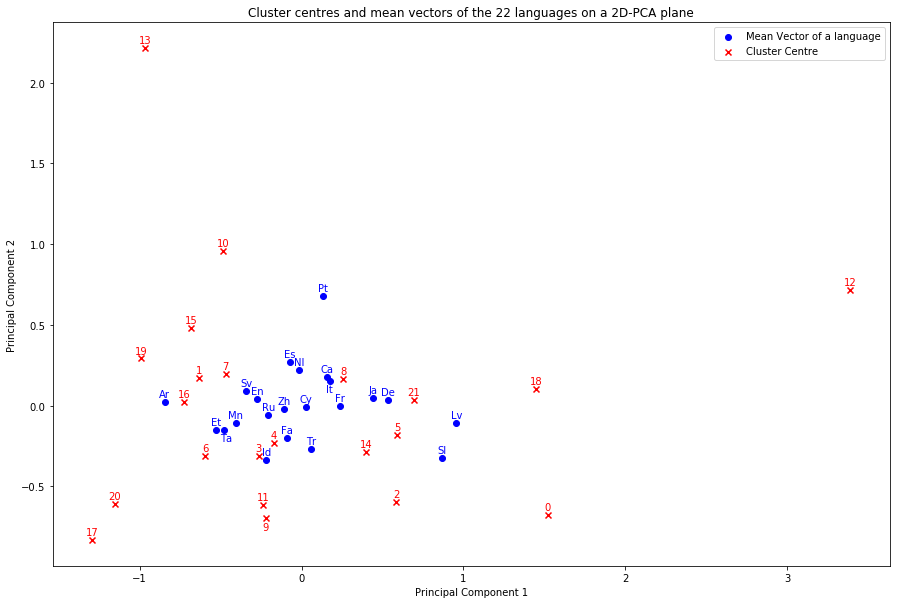

In [20]:
# Q3.2
# Calculate the mean vector for each language
mv = np.zeros((22,26))
for l in range(22):
    idx = np.where(Ytrn == l)
    Xtrn_l = Xtrn[idx[0]]
    mean_l = mean(Xtrn_l)
    mv[l,:] = mean_l

# Apply PCA on the set of 22 mean vectors
pca = PCA(n_components=2)
tform = pca.fit_transform(mv)

# Plot the mean vectors of all the 22 languages on a 2D-PCA plane
lang = ["Ar", "Ca", "Cy", "De", "En", "Es", "Et", "Fa", "Fr", "Id", "It", "Ja", "Lv", "Mn", "Nl", "Ru", "Sl", "Sv", "Pt", "Ta", "Tr", "Zh"]
plt.figure(figsize=(15,10))
plt.scatter(tform[:,0], tform[:,1], color='blue')
for i, txt in enumerate(lang):
    if i!=10 and i !=19:
        plt.annotate(txt, (tform[i,0], tform[i,1]+0.03), ha='center', color='blue')
plt.annotate("It", (tform[10,0], tform[10,1]-0.07), ha='center', color='blue')   
plt.annotate("Ta", (tform[19,0]+0.01, tform[19,1]-0.07), ha='center', color='blue')   

# On the same fig, plot the cluster centres obtained in 3.1
nums = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21"]
cc = kmeans.cluster_centers_
tform2 = pca.fit_transform(cc)
plt.scatter(tform2[:,0], tform2[:,1], marker='x', color='red')
for i, txt in enumerate(nums):
    if i != 9:
        plt.annotate(txt, (tform2[i,0], tform2[i,1]+0.03), ha='center', color='red')
plt.annotate("9", (tform2[9,0], tform2[9,1]-0.07), ha='center', color='red') 
        
plt.legend(["Mean Vector of a language","Cluster Centre"])
plt.title('Cluster centres and mean vectors of the 22 languages on a 2D-PCA plane')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Question 3.3

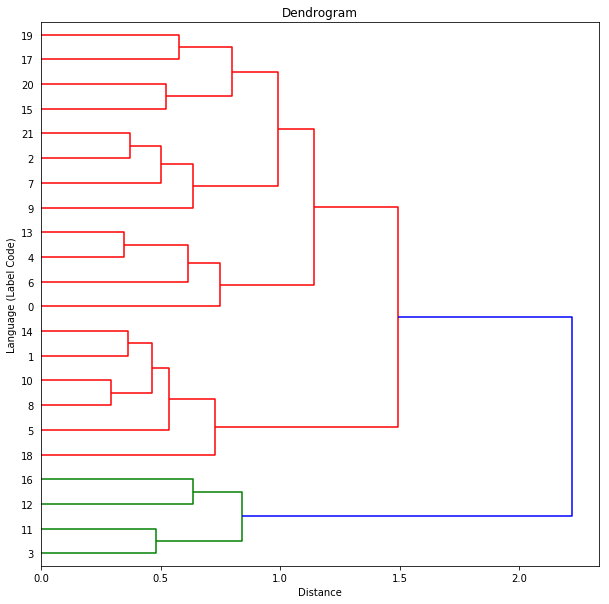

In [21]:
# Q3.3
# Use the 22 mean vectors to carry out hierarchical clustering
z = sch.linkage(mv, 'ward')
plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(z, orientation='right')
plt.title('Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Language (Label Code)')
plt.show()

# Question 3.4

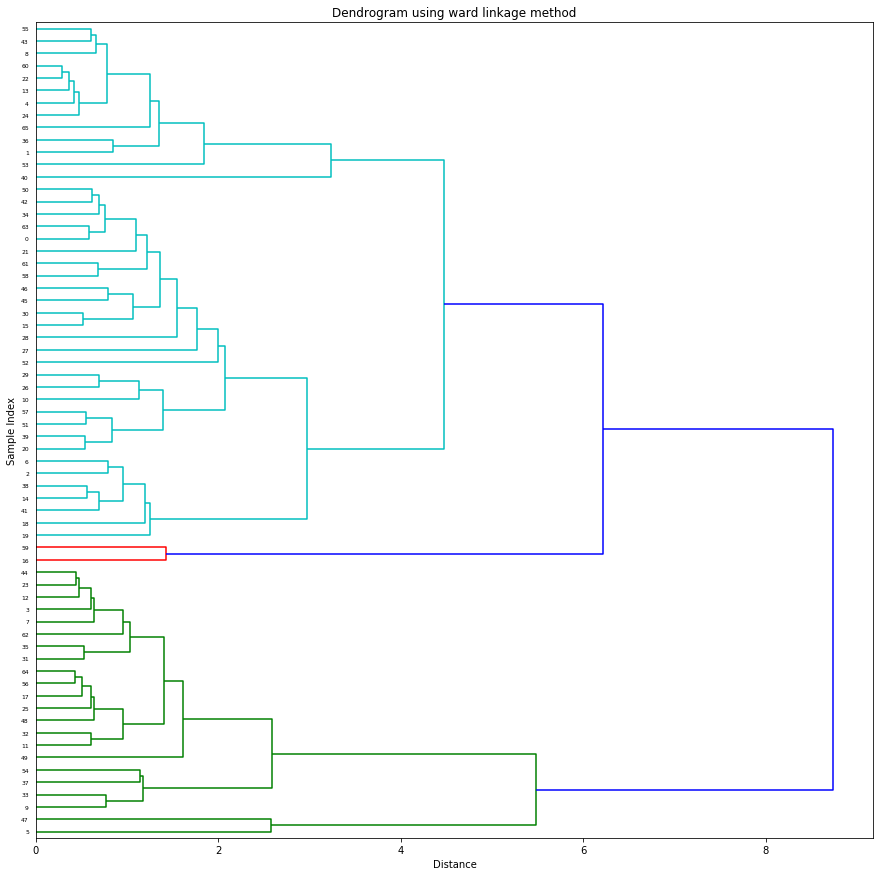

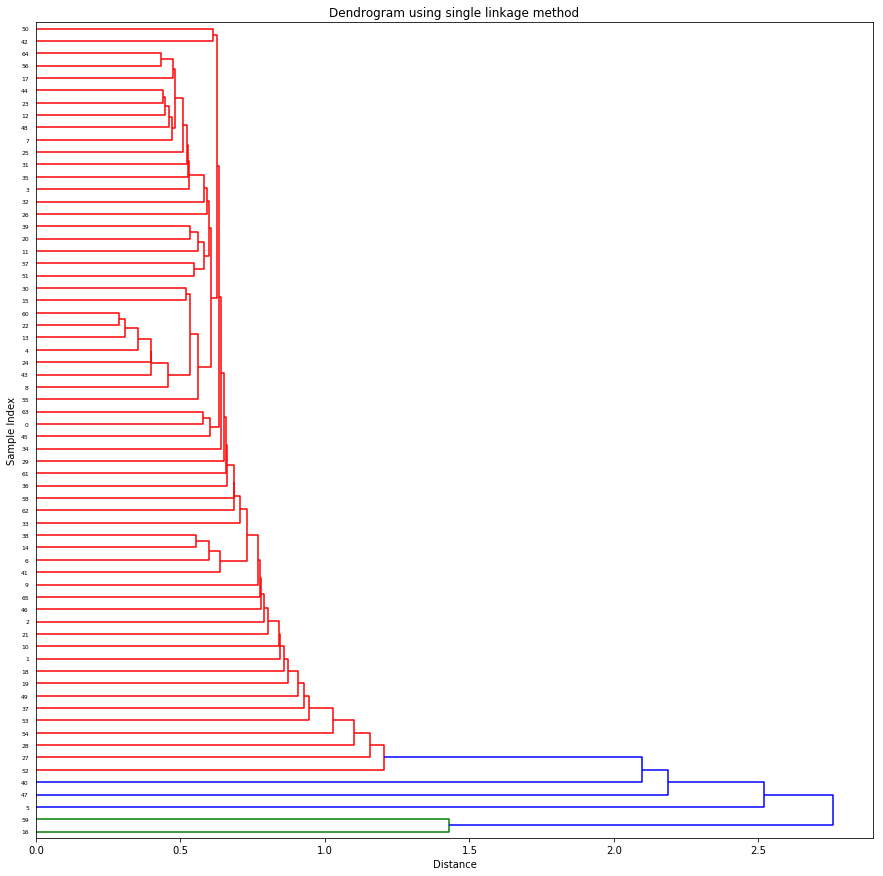

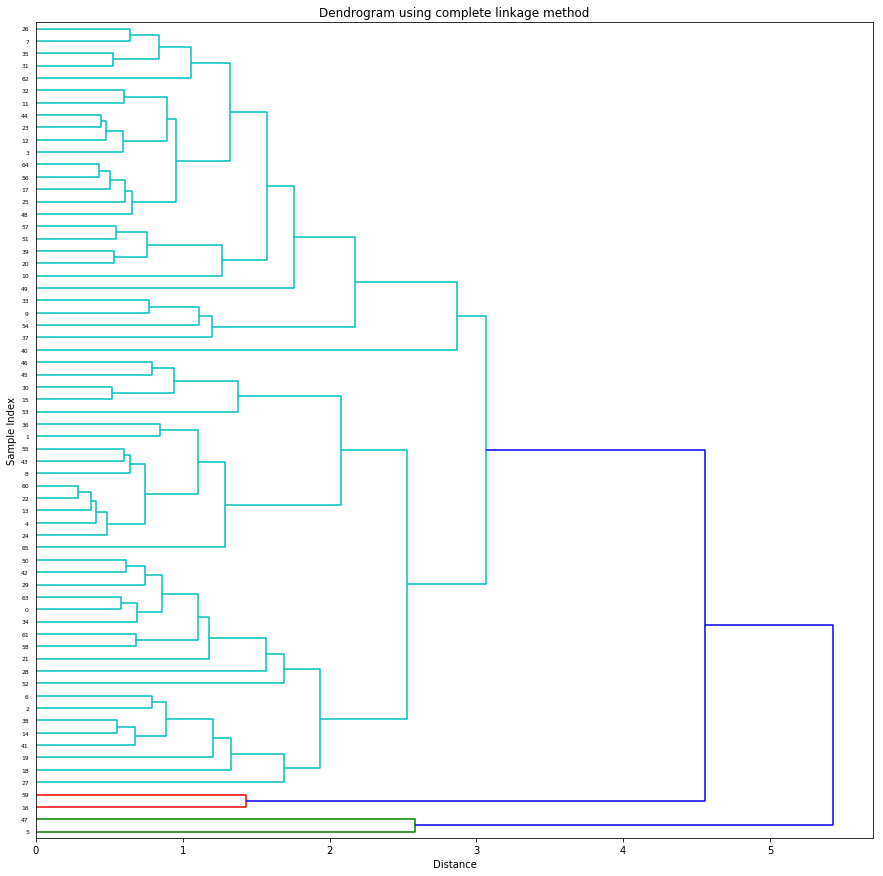

In [22]:
# Q3.4
# Apply kmeans clustering to the training data for each language
vects = np.zeros((66,26))
for l in range(22):
    idx = np.where(Ytrn == l)
    Xtrn_l = Xtrn[idx[0]]
    kmeans_l = KMeans(n_clusters=3, random_state=1).fit(Xtrn_l)
    cc = kmeans_l.cluster_centers_
    for i in range(cc.shape[0]):
        vects[i+(l*3),:] = cc[i]

# Plot dendrogram using 'ward' linkage method
plt.figure(figsize=(15,15))
z = sch.linkage(vects, 'ward')
dendrogram = sch.dendrogram(z, orientation='right')
plt.title('Dendrogram using ward linkage method')
plt.xlabel('Distance')
plt.ylabel('Sample Index')

# Plot dendrogram using 'single' linkage method
plt.figure(figsize=(15,15))
z = sch.linkage(vects, 'single')
dendrogram = sch.dendrogram(z, orientation='right')
plt.title('Dendrogram using single linkage method')
plt.xlabel('Distance')
plt.ylabel('Sample Index')

# Plot dendrogram using 'complete' linkage method
plt.figure(figsize=(15,15))
z = sch.linkage(vects, 'complete')
dendrogram = sch.dendrogram(z, orientation='right')
plt.title('Dendrogram using complete linkage method')
plt.xlabel('Distance')
plt.ylabel('Sample Index')

plt.show()

# Question 3.5

The log likelihood on training data for diag cov matrix and K=1: 14.28
The log likelihood on testing data for diag cov matrix and K=1: 13.84
------
The log likelihood on training data for diag cov matrix and K=3: 15.40
The log likelihood on testing data for diag cov matrix and K=3: 15.04
------
The log likelihood on training data for diag cov matrix and K=5: 16.01
The log likelihood on testing data for diag cov matrix and K=5: 15.91
------
The log likelihood on training data for diag cov matrix and K=10: 16.92
The log likelihood on testing data for diag cov matrix and K=10: 16.57
------
The log likelihood on training data for diag cov matrix and K=15: 17.50
The log likelihood on testing data for diag cov matrix and K=15: 16.90
------
The log likelihood on training data for full cov matrix and K=1: 16.39
The log likelihood on testing data for full cov matrix and K=1: 15.81
------
The log likelihood on training data for full cov matrix and K=3: 18.09
The log likelihood on testing data fo

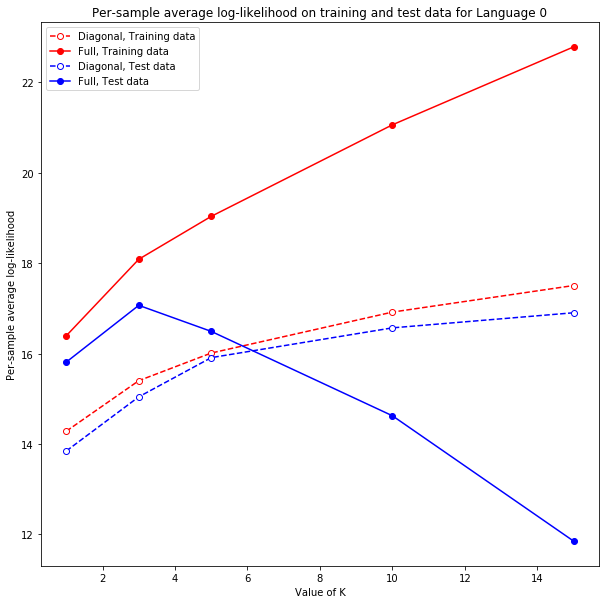

In [39]:
# Q3.5
# Get data for language 0
idx = np.where(Ytrn == 0)
Xtrn_0 = Xtrn[idx[0]]
idx = np.where(Ytst == 0)
Xtst_0 = Xtst[idx[0]]

trn_scores = []
tst_scores = []
K = [1,3,5,10,15]
for ctype in ['diag','full']:
    for k in [1,3,5,10,15]:
        gmm = GaussianMixture(n_components=k, covariance_type=ctype, random_state=1)
        gmm.fit(Xtrn_0)
        score_trn = gmm.score(Xtrn_0)
        trn_scores.append(score_trn)
        score_tst = gmm.score(Xtst_0)
        tst_scores.append(score_tst)
        print("The log likelihood on training data for {} cov matrix and K={}: {:.2f}".format(ctype, k, score_trn))
        print("The log likelihood on testing data for {} cov matrix and K={}: {:.2f}".format(ctype, k, score_tst))
        print("------")
        
# Plot
plt.figure(figsize=(10,10))
plt.plot(K, trn_scores[:5], '-ok', color='r', linestyle='--', markerfacecolor='white')
plt.plot(K, trn_scores[5:10], '-ok', color='r')
plt.plot(K, tst_scores[:5], '-ok', color='b', linestyle='--', markerfacecolor='white')
plt.plot(K, tst_scores[5:10], '-ok', color='b')
plt.legend(["Diagonal, Training data", "Full, Training data", "Diagonal, Test data", "Full, Test data", "Diagonal, Training data"])
plt.xlabel("Value of K")
plt.ylabel("Per-sample average log-likelihood")
plt.title("Per-sample average log-likelihood on training and test data for Language 0")
plt.show()